In [33]:
import pandas as pd
import matplotlib.pyplot as plt

Data from [here](https://data.kcmo.org/Crime/KCPD-Crime-Data-2019/pxaa-ahcm)

In [34]:
df = pd.read_csv('../../Data/KCPD_Crime_Data_2019.csv')

In [35]:
df.head()

,Report_No,Reported_Date,Reported_Time,From_Date,From_Time,To_Date,To_Time,Offense,IBRS,Description,...,Zip Code,Rep_Dist,Area,DVFlag,Involvement,Race,Sex,Age,Firearm Used Flag,Location
0,KC19019972,03/19/2019,08:48,03/19/2019,08:48,03/19/2019,09:33,Vehicular – Non-Injury,NaN,NaN,...,64161.0,PC1239,SCP,N,ARR CHA VDR,W,F,41.0,False,NaN
1,KC19020439,03/20/2019,17:11,03/20/2019,17:30,NaN,NaN,City/Municipal Warrant Arrest,NaN,NaN,...,64068.0,NaN,OSPD,N,ARR CHA SUS,W,M,31.0,False,NaN
2,KC19021179,03/23/2019,09:40,03/23/2019,09:40,NaN,NaN,Vehicular – Injury,NaN,NaN,...,64155.0,PC0277,NPD,N,ARR CHA VDR,W,M,41.0,False,NaN
3,KC19021555,03/25/2019,07:35,03/25/2019,09:09,NaN,NaN,Possession/Sale/Distribution of a Controlled S...,35A,Drug / Narcotic Violations,...,64108.0,PJ1831,CPD,N,ARR CHA SUS,B,M,31.0,False,NaN
4,KC19021815,03/26/2019,06:04,03/26/2019,07:20,03/26/2019,08:00,Stealing – Shoplift,23C,Shoplifting,...,64133.0,PJ3601,EPD,N,VIC,NaN,NaN,NaN,False,NaN


In [36]:
df.shape

(78046, 23)

### What is a Time Series?

A time series is a sequence of numerical data points in successive order.

In [37]:
df[df['Reported_Date'] == '03/20/2019']

,Report_No,Reported_Date,Reported_Time,From_Date,From_Time,To_Date,To_Time,Offense,IBRS,Description,...,Zip Code,Rep_Dist,Area,DVFlag,Involvement,Race,Sex,Age,Firearm Used Flag,Location
1,KC19020439,03/20/2019,17:11,03/20/2019,17:30,NaN,NaN,City/Municipal Warrant Arrest,NaN,NaN,...,64068.0,NaN,OSPD,N,ARR CHA SUS,W,M,31.0,False,NaN
773,KC19020290,03/20/2019,09:25,03/19/2019,20:15,03/20/2019,08:20,Stealing from Auto (Theft from Auto),23H,All Other Larceny,...,64154.0,PP0303,NPD,N,CMP VIC,W,F,44.0,False,5600 NW 87TH TER\nKANSAS CITY 64154\n(39.2534...
1194,KC19020462,03/20/2019,18:55,03/19/2019,21:00,03/20/2019,17:30,Burglary (Residential),220,Burglary/Breaking and Entering,...,64119.0,PC0613,NPD,N,CMP VIC,B,F,56.0,False,6100 N MADISON AVE\nKANSAS CITY 64119\n(39.20...
1854,KC19020338,03/20/2019,12:12,03/20/2019,10:00,NaN,NaN,Stealing from Auto (Auto Part or Accessory),23G,Theft of Vehicle Parts and Accessories,...,64151.0,PP0424,NPD,N,CMP VIC,W,M,59.0,False,2600 NW 79TH TER\nKANSAS CITY 64151\n(39.2378...
2127,KC19020364,03/20/2019,13:58,12/01/2018,:,03/01/2019,NaN,Unfounded,13B,Simple Assault,...,64124.0,NaN,EPD,N,VIC,W,M,NaN,False,600 HARDESTY AVE\nKANSAS CITY 64124\n(39.1052...
2191,KC19020485,03/20/2019,20:29,03/20/2019,20:29,NaN,NaN,Recovered Stolen Auto,280,Stolen Property Offenses,...,64117.0,PC1197,SCP,N,CHA INA SUS,W,F,27.0,False,N CLEVELAND AVE and NE 41ST ST\nKANSAS CITY 64...
2771,KC19020511,03/20/2019,23:26,03/20/2019,16:30,NaN,NaN,Identity Theft,26F,Identity Theft,...,64151.0,PP0373,NPD,N,CMP VIC,W,M,29.0,False,8200 NW WAUKOMIS DR\nKANSAS CITY 64151\n(39.2...
3141,KC19020372,03/20/2019,14:14,03/17/2019,18:30,NaN,NaN,Stealing – Other,23H,All Other Larceny,...,NaN,PC0386,NPD,N,SUS,U,M,NaN,False,"500 NW BARRY RD\nKANSAS CITY\n(39.246435, -94..."
3430,KC19020364,03/20/2019,13:58,12/01/2018,:,03/01/2019,NaN,Unfounded,13B,Simple Assault,...,64124.0,NaN,EPD,N,VIC,W,F,NaN,False,600 HARDESTY AVE\nKANSAS CITY 64124\n(39.1052...
3804,KC19020493,03/20/2019,20:01,03/20/2019,17:30,NaN,NaN,Stolen Auto,240,Motor Vehicle Theft,...,64157.0,PC0430,SCP,N,ARR CHA,W,M,26.0,False,9800 NE BARRY RD\nKANSAS CITY 64157\n(39.2447...


In [38]:
df['Offense'].value_counts()

Domestic Violence Assault (Non-Aggravated)    6232
Assault (Aggravated)                          4558
Stolen Auto                                   4504
Stealing – Shoplift                           4435
Property Damage                               4344
                                              ... 
Incest                                           2
Outside Correspondence                           2
Tampering with Physical Evidence                 1
Tobacco Law Violation                            1
Cold Case Homicide                               1
Name: Offense, Length: 137, dtype: int64

In [39]:
df_pd = df[df['Offense'] == 'Property Damage'].copy()
df_pd.head()

,Report_No,Reported_Date,Reported_Time,From_Date,From_Time,To_Date,To_Time,Offense,IBRS,Description,...,Zip Code,Rep_Dist,Area,DVFlag,Involvement,Race,Sex,Age,Firearm Used Flag,Location
5,KC19021991,03/26/2019,17:49,03/25/2019,20:10,NaN,NaN,Property Damage,290,Vandalism/Destruction of Property,...,64133.0,NaN,MPD,N,VIC,B,M,61.0,False,NaN
30,KC19024382,04/04/2019,08:27,04/03/2019,20:56,04/03/2019,21:04,Property Damage,290,Vandalism/Destruction of Property,...,64108.0,PJ2072,CPD,N,VIC,NaN,NaN,NaN,False,NaN
44,KC19026110,04/10/2019,14:36,04/05/2019,12:30,NaN,NaN,Property Damage,290,Vandalism/Destruction of Property,...,64118.0,PC1221,SCP,N,VIC,NaN,NaN,NaN,False,NaN
63,KC19027946,04/17/2019,09:07,04/15/2019,18:00,04/15/2019,23:50,Property Damage,290,Vandalism/Destruction of Property,...,64119.0,PC1231,SCP,N,VIC,W,M,69.0,False,NaN
139,KC19037132,05/20/2019,10:54,05/10/2019,01:00,05/10/2019,01:00,Property Damage,290,Vandalism/Destruction of Property,...,64127.0,NaN,EPD,N,SUS,B,M,NaN,False,NaN


In [40]:
df_pd.set_index('From_Date', inplace = True)
df_pd.head()

,Report_No,Reported_Date,Reported_Time,From_Time,To_Date,To_Time,Offense,IBRS,Description,Beat,...,Zip Code,Rep_Dist,Area,DVFlag,Involvement,Race,Sex,Age,Firearm Used Flag,Location
From_Date,,,,,,,,,,,,,,,,,,,,,
03/25/2019,KC19021991,03/26/2019,17:49,20:10,NaN,NaN,Property Damage,290,Vandalism/Destruction of Property,212,...,64133.0,NaN,MPD,N,VIC,B,M,61.0,False,NaN
04/03/2019,KC19024382,04/04/2019,08:27,20:56,04/03/2019,21:04,Property Damage,290,Vandalism/Destruction of Property,115,...,64108.0,PJ2072,CPD,N,VIC,NaN,NaN,NaN,False,NaN
04/05/2019,KC19026110,04/10/2019,14:36,12:30,NaN,NaN,Property Damage,290,Vandalism/Destruction of Property,632,...,64118.0,PC1221,SCP,N,VIC,NaN,NaN,NaN,False,NaN
04/15/2019,KC19027946,04/17/2019,09:07,18:00,04/15/2019,23:50,Property Damage,290,Vandalism/Destruction of Property,632,...,64119.0,PC1231,SCP,N,VIC,W,M,69.0,False,NaN
05/10/2019,KC19037132,05/20/2019,10:54,01:00,05/10/2019,01:00,Property Damage,290,Vandalism/Destruction of Property,331,...,64127.0,NaN,EPD,N,SUS,B,M,NaN,False,NaN


In [41]:
df_pd.index

Index(['03/25/2019', '04/03/2019', '04/05/2019', '04/15/2019', '05/10/2019',
       '05/25/2019', '05/27/2019', '06/15/2019', '06/15/2019', '06/15/2019',
       ...
       '12/24/2019', '12/14/2019', '12/04/2019', '12/06/2019', '11/25/2019',
       '12/13/2019', '12/07/2019', '12/11/2019', '11/19/2019', '12/17/2019'],
      dtype='object', name='From_Date', length=4344)

In [42]:
df_pd.index = pd.to_datetime(df_pd.index)
df_pd.index

DatetimeIndex(['2019-03-25', '2019-04-03', '2019-04-05', '2019-04-15',
               '2019-05-10', '2019-05-25', '2019-05-27', '2019-06-15',
               '2019-06-15', '2019-06-15',
               ...
               '2019-12-24', '2019-12-14', '2019-12-04', '2019-12-06',
               '2019-11-25', '2019-12-13', '2019-12-07', '2019-12-11',
               '2019-11-19', '2019-12-17'],
              dtype='datetime64[ns]', name='From_Date', length=4344, freq=None)

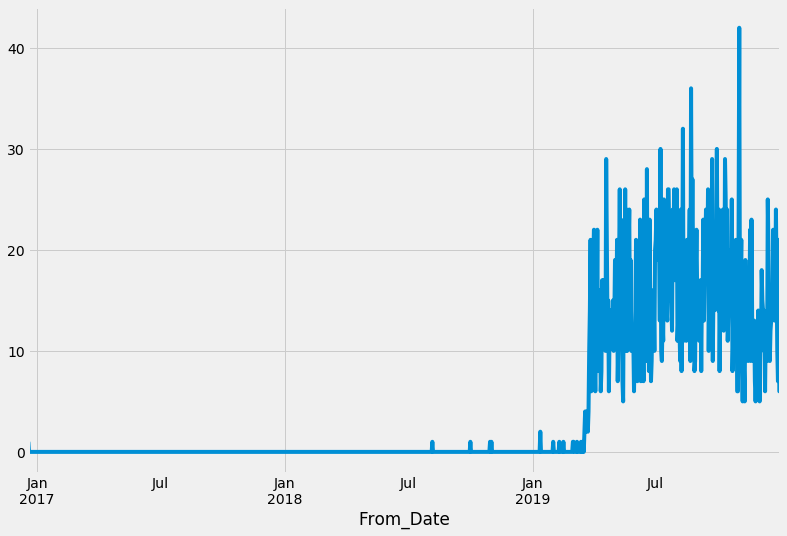

In [43]:
with plt.style.context('fivethirtyeight'):
    df_pd.resample('D')['Report_No'].count().plot(figsize = (12, 8))

In [44]:
df_ts = df_pd.resample('D')['Report_No'].count()

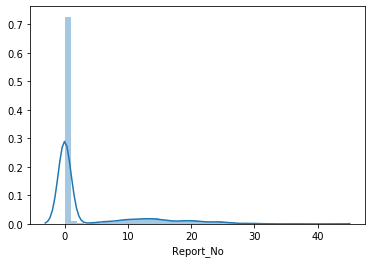

In [45]:
import seaborn as sns
sns.distplot(df_ts)

In [46]:
df_ts = df_ts.loc['2019-04-01':'2019-12-31']

In [47]:
df_ts

From_Date
2019-04-01    22
2019-04-02     9
2019-04-03     6
2019-04-04    10
2019-04-05    13
              ..
2019-12-27    10
2019-12-28     7
2019-12-29    21
2019-12-30     6
2019-12-31     6
Freq: D, Name: Report_No, Length: 275, dtype: int64

## Stationarity

A time series is said to be stationary if its statistical properties such as mean, variance, etc. remain constant over time. 

Why is it important? Because most time series models work on the assumption that **the time series are stationary**.

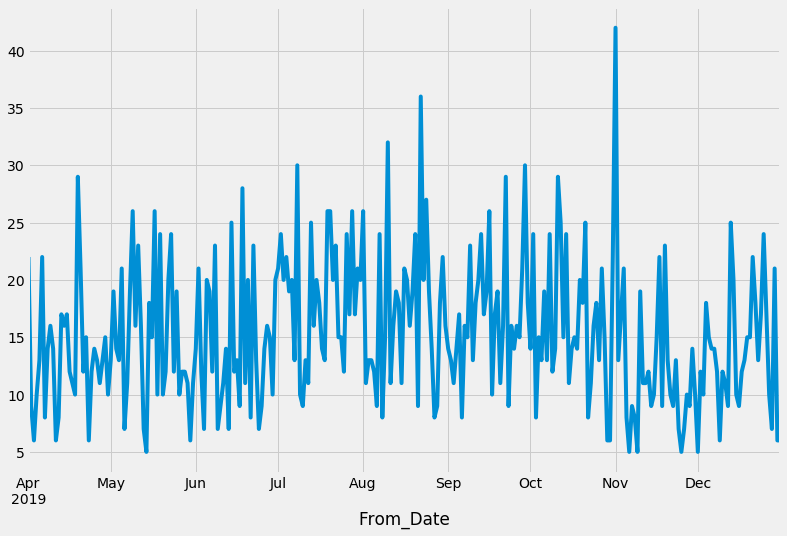

In [49]:
with plt.style.context('fivethirtyeight'):
    df_ts.plot(figsize = (12, 8))

In [60]:
df_ts

From_Date
2019-04-01    22
2019-04-02     9
2019-04-03     6
2019-04-04    10
2019-04-05    13
              ..
2019-12-27    10
2019-12-28     7
2019-12-29    21
2019-12-30     6
2019-12-31     6
Freq: D, Name: Report_No, Length: 275, dtype: int64

In [50]:
roll_mean = df_ts.rolling(window = 7).mean()
roll_std = df_ts.rolling(window = 7).std()

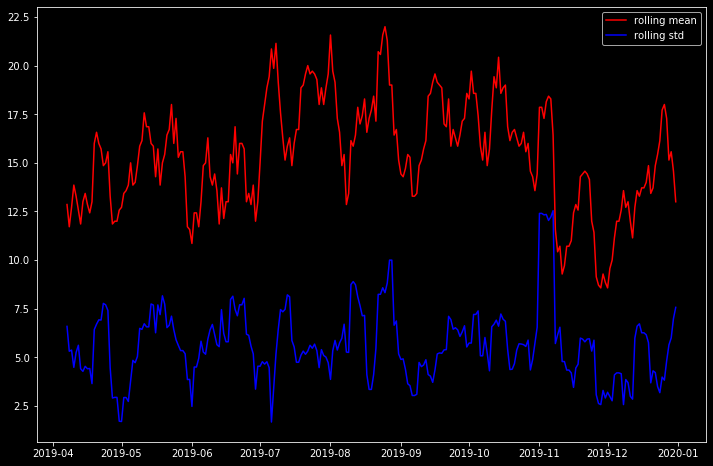

In [61]:
with plt.style.context('dark_background'):
    fig = plt.figure(figsize = (12, 8))
    #plt.plot(df_ts, color = 'white')
    plt.plot(roll_mean, label = 'rolling mean', color = 'red')
    plt.plot(roll_std, label = 'rolling std', color = 'blue')
    plt.legend()
    plt.show()

In [62]:
from statsmodels.tsa.stattools import adfuller

In [63]:
adfuller(df_ts)

(-5.277122836570854,
 6.1058583892884325e-06,
 5,
 269,
 {'1%': -3.4548957220044336,
  '5%': -2.8723451788613157,
  '10%': -2.572527778361272},
 1671.9935752569736)

Here's a dataset from Learn.co, lets see how it does with the Dickey Fuller Test 

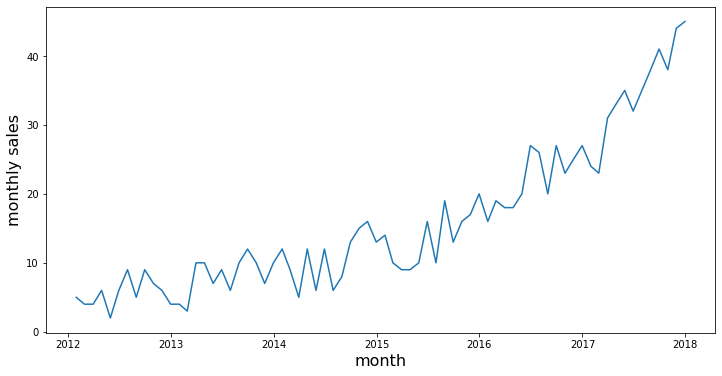

In [64]:
import numpy as np

years = pd.date_range('2012-01', periods=72, freq='M')
index = pd.DatetimeIndex(years)

np.random.seed(3456)
sales= np.random.randint(-4, high=4, size=72)
bigger = np.array([0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,3,3,3,3,
                   3,3,3,3,3,3,3,3,7,7,7,7,7,7,7,7,7,7,7,
                   11,11,11,11,11,11,11,11,11,11,18,18,18,
                   18,18,18,18,18,18,26,26,26,26,26,36,36,36,36,36])
data = pd.Series(sales+bigger+6, index=index)
ts = data
fig = plt.figure(figsize=(12,6))
plt.plot(data)
plt.xlabel('month', fontsize=16)
plt.ylabel('monthly sales', fontsize=16)
plt.show()

In [65]:
adfuller(ts)

(3.761375741674094,
 1.0,
 8,
 63,
 {'1%': -3.5386953618719676,
  '5%': -2.9086446751210775,
  '10%': -2.591896782564878},
 314.84474355172597)

In [70]:
roll_mean = ts.rolling(window = 7).mean()
roll_std = ts.rolling(window = 7).std()

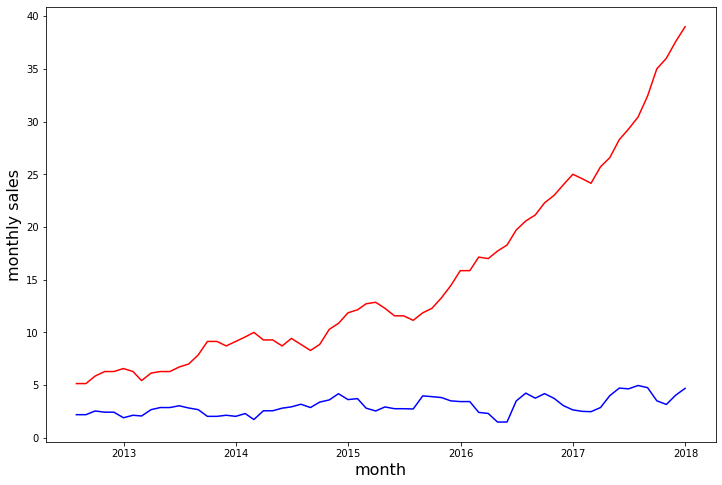

In [71]:
plt.figure(figsize = (12, 8))
#plt.plot(data)
plt.plot(roll_mean, color = 'red')
plt.plot(roll_std, color = 'blue')
plt.xlabel('month', fontsize=16)
plt.ylabel('monthly sales', fontsize=16)
plt.show()

Examples of [Non-Stationarity](https://learn.co/tracks/module-4-data-science-career-2-1/big-data-deep-learning-and-natural-language-processing/section-37-working-with-time-series-data/types-of-trends)

In [74]:
ts_diff = ts.diff(periods = 1)
ts_diff.head()

2012-01-31    NaN
2012-02-29   -1.0
2012-03-31    0.0
2012-04-30    2.0
2012-05-31   -4.0
Freq: M, dtype: float64

In [73]:
ts.head()

2012-01-31    5
2012-02-29    4
2012-03-31    4
2012-04-30    6
2012-05-31    2
Freq: M, dtype: int64

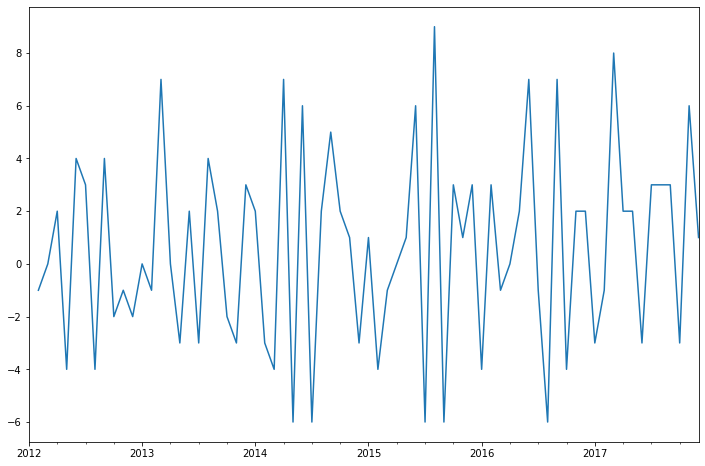

In [75]:
ts_diff.plot(figsize = (12, 8))

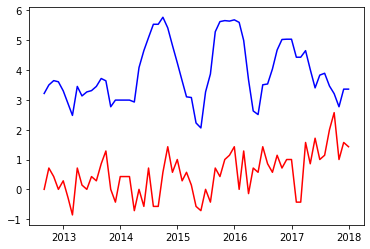

In [76]:
rolling_mean = ts_diff.rolling(window = 7).mean()
rolling_std = ts_diff.rolling(window = 7).std()

plt.plot(rolling_mean, color = 'red')
plt.plot(rolling_std, color = 'blue')

In [80]:
adfuller(ts_diff.dropna())

(-6.455929660591098,
 1.4835154528971145e-08,
 2,
 68,
 {'1%': -3.530398990560757,
  '5%': -2.9050874099328317,
  '10%': -2.5900010121107266},
 311.5103050425881)

<img src="images/trendseasonal.png" alt="Drawing" style="width: 800px;"/>

In [81]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df_ts)

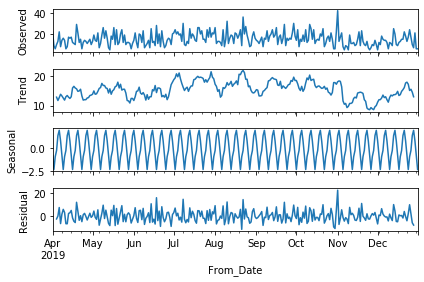

In [83]:
decomposition.plot();

In [87]:
trend = decomposition.trend
season = decomposition.seasonal
residual = decomposition.resid

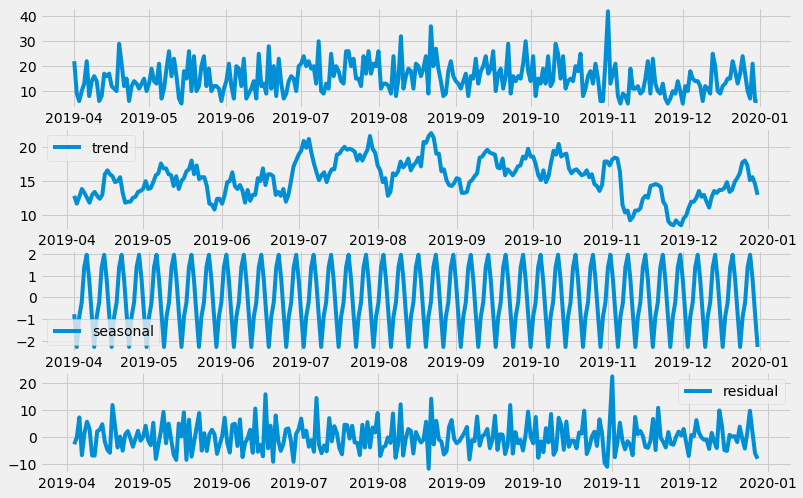

In [95]:
with plt.style.context('fivethirtyeight'):
    plt.figure(figsize = (12, 8))
    plt.subplot(411)
    plt.plot(df_ts, label = 'original')
    plt.subplot(412)
    plt.plot(trend, label = 'trend')
    plt.legend()
    plt.subplot(413)
    plt.plot(season, label = 'seasonal')
    plt.legend()
    plt.subplot(414)
    plt.plot(residual, label = 'residual')
    plt.legend()

In [96]:
season[:20]

From_Date
2019-04-01   -0.779944
2019-04-02   -2.294982
2019-04-03   -0.896486
2019-04-04   -0.224807
2019-04-05    1.397904
2019-04-06    1.972996
2019-04-07    0.825319
2019-04-08   -0.779944
2019-04-09   -2.294982
2019-04-10   -0.896486
2019-04-11   -0.224807
2019-04-12    1.397904
2019-04-13    1.972996
2019-04-14    0.825319
2019-04-15   -0.779944
2019-04-16   -2.294982
2019-04-17   -0.896486
2019-04-18   -0.224807
2019-04-19    1.397904
2019-04-20    1.972996
Freq: D, Name: Report_No, dtype: float64

In [97]:
pd_daily = pd.DataFrame(df_ts)
pd_daily.head()

,Report_No
From_Date,
2019-04-01,22
2019-04-02,9
2019-04-03,6
2019-04-04,10
2019-04-05,13


In [99]:
pd_daily['Day_of_Week'] = pd_daily.index.day_name()

In [100]:
pd_daily.head()

,Report_No,Day_of_Week
From_Date,,
2019-04-01,22,Monday
2019-04-02,9,Tuesday
2019-04-03,6,Wednesday
2019-04-04,10,Thursday
2019-04-05,13,Friday


In [101]:
df_daily = pd_daily.groupby('Day_of_Week')['Report_No'].mean()

Day_of_Week
Friday       16.717949
Monday       14.650000
Saturday     17.282051
Sunday       16.384615
Thursday     15.153846
Tuesday      12.875000
Wednesday    14.282051
Name: Report_No, dtype: float64

In [104]:
df_daily = pd_daily.groupby('Day_of_Week')['Report_No'].mean()

In [102]:
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
mapping = {day: i for i, day in enumerate(days)}

In [103]:
mapping

{'Monday': 0,
 'Tuesday': 1,
 'Wednesday': 2,
 'Thursday': 3,
 'Friday': 4,
 'Saturday': 5,
 'Sunday': 6}

In [105]:
key = pd_daily.index.map(mapping)

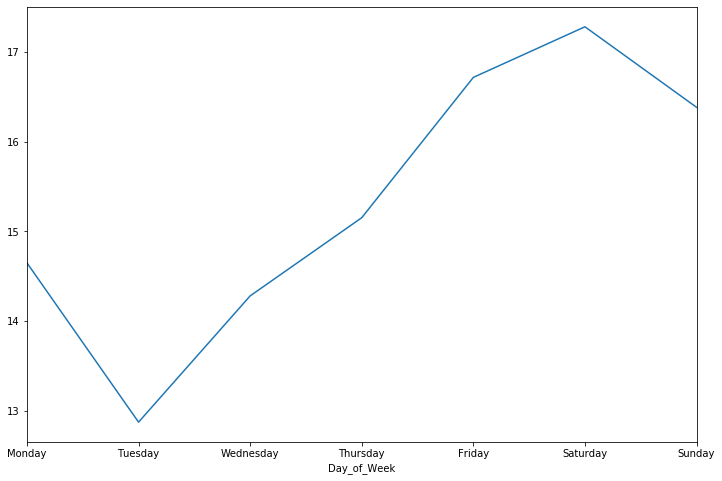

In [111]:
df_daily.reindex(days).plot(kind = 'line', figsize = (12, 8))

In [112]:
season[:20]

From_Date
2019-04-01   -0.779944
2019-04-02   -2.294982
2019-04-03   -0.896486
2019-04-04   -0.224807
2019-04-05    1.397904
2019-04-06    1.972996
2019-04-07    0.825319
2019-04-08   -0.779944
2019-04-09   -2.294982
2019-04-10   -0.896486
2019-04-11   -0.224807
2019-04-12    1.397904
2019-04-13    1.972996
2019-04-14    0.825319
2019-04-15   -0.779944
2019-04-16   -2.294982
2019-04-17   -0.896486
2019-04-18   -0.224807
2019-04-19    1.397904
2019-04-20    1.972996
Freq: D, Name: Report_No, dtype: float64

In [113]:
pd_daily.head(7)

,Report_No,Day_of_Week
From_Date,,
2019-04-01,22,Monday
2019-04-02,9,Tuesday
2019-04-03,6,Wednesday
2019-04-04,10,Thursday
2019-04-05,13,Friday
2019-04-06,22,Saturday
2019-04-07,8,Sunday


## Further Details 
- https://machinelearningmastery.com/decompose-time-series-data-trend-seasonality/#:~:text=Trend%3A%20The%20increasing%20or%20decreasing,random%20variation%20in%20the%20series.